<a href="https://colab.research.google.com/github/taniokah/DL-Basic-Seminar/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Example

## 手書き数字認識プログラム

本サンプルは Keras (Tensorflow) を用いてMNISTデータを学習します。

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


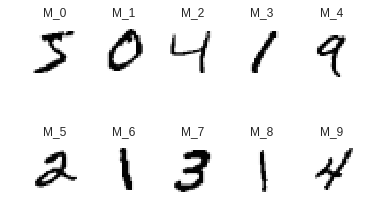

In [1]:
# coding: utf-8
# MNISTサンプル

# Kerasをインポート
import keras

# MINISTのデータの他、必要なモジュールをインポート
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, CSVLogger
%matplotlib inline
import matplotlib.pyplot as plt

# バッチサイズ、クラス数、エポック数を定義
batch_size = 128
num_classes = 10
epochs = 20

# MNISTデータを読込
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# MNISTデータのうち10枚だけ表示
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("M_%d" % i)
    plt.axis("off")
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)
plt.show()


In [2]:
# 画像サイズを正規化
x_train = x_train.reshape(60000, 784).astype('float32')
x_test = x_test.reshape(10000, 784).astype('float32')
x_train /= 255
x_test /= 255
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 確認のために表示
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [3]:
# モデルを作成
model = Sequential()
model.add(Dense(512, input_shape=(784, )))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

# サマリーを出力
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)  

In [4]:
# モデルのコンパイル
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss', patience=2)
csv_logger = CSVLogger('training.log')
hist = model.fit(x_train, y_train,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1,
                 validation_split=0.1,
                 callbacks=[es, csv_logger])

# 学習を実行
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test acc:', score[1])


Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 8s 156us/step - loss: 0.2595 - acc: 0.9199 - val_loss: 0.1194 - val_acc: 0.9623
Epoch 2/20
54000/54000 [==============================] - 9s 165us/step - loss: 0.1081 - acc: 0.9676 - val_loss: 0.0930 - val_acc: 0.9722
Epoch 3/20
54000/54000 [==============================] - 9s 161us/step - loss: 0.0802 - acc: 0.9760 - val_loss: 0.0857 - val_acc: 0.9743
Epoch 4/20
54000/54000 [==============================] - 8s 156us/step - loss: 0.0636 - acc: 0.9810 - val_loss: 0.0764 - val_acc: 0.9795
Epoch 5/20
54000/54000 [==============================] - 8s 157us/step - loss: 0.0531 - acc: 0.9839 - val_loss: 0.0779 - val_acc: 0.9815
Epoch 6/20
54000/54000 [==============================] - 9s 159us/step - loss: 0.0467 - acc: 0.9855 - val_loss: 0.0661 - val_acc: 0.9850
Epoch 7/20
54000/54000 [==============================] - 8s 156us/step - l

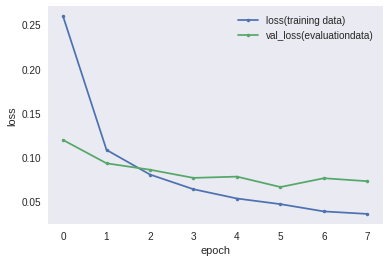

In [5]:
# 学習結果を表示
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = len(loss)
plt.plot(range(epochs), loss, marker='.', label='loss(training data)')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss(evaluationdata)')
plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


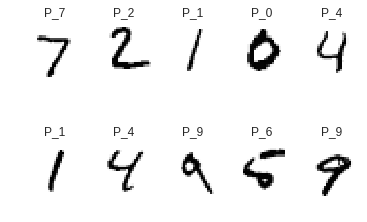

In [6]:
# MNISTデータのうち10枚だけ判定
for i in range(10):
    plt.subplot(2, 5, i+1)
    pred = model.predict_classes(x_test[i:i+1])
    plt.title("P_%d" % pred[0])
    plt.axis("off")
    plt.imshow(x_test[i].reshape(28, 28), cmap=None)
plt.show()
